### KMeans 예제 - iris

In [22]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import numpy as numpy
import pandas as pd 
%matplotlib inline

In [9]:
iris=load_iris()
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0) #3개로 군집화 
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [13]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [15]:
irisDF['target']=iris.target
irisDF['cluster']= kmeans.labels_ 
irisDF 

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [16]:
#실제 타겟값과 예측한 군집과 비교 
irisDF.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [18]:
#4차원 -> 2차원 차원 축소 후 시각화 
from sklearn.decomposition import PCA

pca= PCA(n_components=2) #2차원
pca_transformed=pca.fit_transform(iris.data)
pca_transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [19]:
irisDF['pca_x']=pca_transformed[:, 0] #첫번째 열
irisDF['pca_y']=pca_transformed[:, 1] #두번째 열
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


In [20]:
irisDF[irisDF['cluster']==0].index 

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
50,7.0,3.2,4.7,1.4,1,0,1.284826,0.685160
51,6.4,3.2,4.5,1.5,1,0,0.932489,0.318334
53,5.5,2.3,4.0,1.3,1,0,0.183318,-0.827959
54,6.5,2.8,4.6,1.5,1,0,1.088103,0.074591
55,5.7,2.8,4.5,1.3,1,0,0.641669,-0.418247
...,...,...,...,...,...,...,...,...
133,6.3,2.8,5.1,1.5,2,0,1.444161,-0.143413
138,6.0,3.0,4.8,1.8,2,0,1.169326,-0.164990
142,5.8,2.7,5.1,1.9,2,0,1.415236,-0.574916
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317


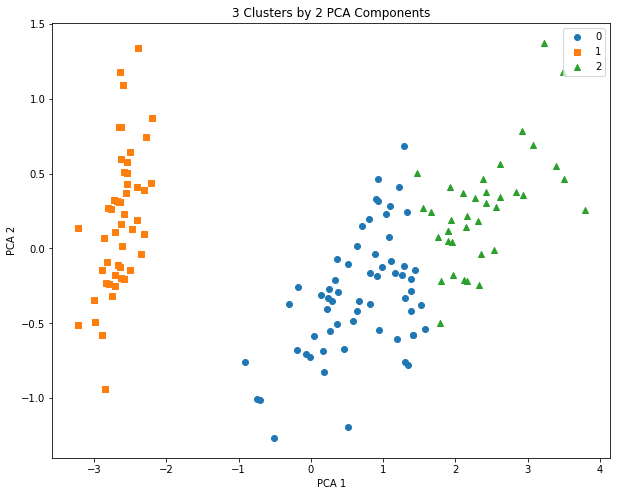

In [29]:
plt.figure(figsize=(10,8))

plt.scatter(x= irisDF.loc[irisDF[irisDF['cluster']==0].index, 'pca_x'], y=irisDF.loc[irisDF[irisDF['cluster']==0].index, 'pca_y'], marker='o', label='0')
plt.scatter(x= irisDF.loc[irisDF[irisDF['cluster']==1].index, 'pca_x'], y=irisDF.loc[irisDF[irisDF['cluster']==1].index, 'pca_y'], marker='s', label='1')
plt.scatter(x= irisDF.loc[irisDF[irisDF['cluster']==2].index, 'pca_x'], y=irisDF.loc[irisDF[irisDF['cluster']==2].index, 'pca_y'], marker='^', label='2')    
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters by 2 PCA Components')
plt.legend()
plt.show()

#### 1은 명확하게 군집화되었지만, 0과 2는 1만큼 명확하게 분리되어 있지는 않다. 